In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sharifahrodziahhanim","key":"ce4cd71d5f8d3619ec8c61e42ca34759"}'}

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                           Chocolate Sales Data 📊🍫                                14473  2025-03-19 03:51:40.270000          18635        313  1.0              
adilshamim8/student-depression-dataset                      Student Depression Dataset                            467020  2025-03-13 03:12:30.423000           9598        137  1.0              
atharvasoundankar/impact-of-ai-on-digital-media-2020-2025   🌍 Impact of AI on Digital Media (2020-2025)             5812  2025-04-03 09:12:25.070000           1029         25  1.0              
amansingh0000000/ipl-dataset-2

In [8]:
!kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles

Dataset URL: https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles
License(s): DbCL-1.0


In [9]:
! mkdir train
! unzip uk-road-safety-accidents-and-vehicles.zip -d train

Archive:  uk-road-safety-accidents-and-vehicles.zip
  inflating: train/Accident_Information.csv  
  inflating: train/Vehicle_Information.csv  


In [10]:
import os
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train/Vehicle_Information.csv
train/Accident_Information.csv


In [11]:
acc = pd.read_csv("train/Accident_Information.csv")
acc.head()

<ipython-input-11-0c3161b32f20>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  acc = pd.read_csv("train/Accident_Information.csv")


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [12]:
veh = pd.read_csv("train/Vehicle_Information.csv", encoding='ISO-8859-1', na_values=['NaN', 'N/A', '', '?', 'Unknown'], sep=',',)
acc.shape

(2047256, 34)

In [13]:
df = pd.merge(acc, veh, how = 'inner', on = 'Accident_Index' )
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',


In [14]:
df1 = df[['1st_Road_Class', 'Junction_Detail', "Accident_Index", 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week','Latitude', 'Light_Conditions',  'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x','Age_Band_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Skidding_and_Overturning',  'Vehicle_Type', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway']]

In [15]:
df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   1st_Road_Class              object 
 1   Junction_Detail             object 
 2   Accident_Index              object 
 3   Accident_Severity           object 
 4   Carriageway_Hazards         object 
 5   Date                        object 
 6   Day_of_Week                 object 
 7   Latitude                    float64
 8   Light_Conditions            object 
 9   Longitude                   float64
 10  LSOA_of_Accident_Location   object 
 11  Number_of_Casualties        int64  
 12  Number_of_Vehicles          int64  
 13  Road_Surface_Conditions     object 
 14  Road_Type                   object 
 15  Special_Conditions_at_Site  object 
 16  Speed_limit                 float64
 17  Time                        object 
 18  Urban_or_Rural_Area         object 
 19  Weather_Conditions   

### Models
- Classifying attribute information according to severity
- Predicting severity of a location using severity index

### Preprocessing

In [16]:
# Replace NaN with string 'None' in just those columns
df1['Carriageway_Hazards'] = df1['Carriageway_Hazards'].fillna('None')
df1['Special_Conditions_at_Site'] = df1['Special_Conditions_at_Site'].fillna('None')
df1['Skidding_and_Overturning'] = df1['Special_Conditions_at_Site'].fillna('None')
df1['Hit_Object_in_Carriageway'] = df1['Special_Conditions_at_Site'].fillna('None')
df1['Hit_Object_off_Carriageway'] = df1['Special_Conditions_at_Site'].fillna('None')



<ipython-input-16-a7a94f0f6915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Carriageway_Hazards'] = df1['Carriageway_Hazards'].fillna('None')
<ipython-input-16-a7a94f0f6915>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Special_Conditions_at_Site'] = df1['Special_Conditions_at_Site'].fillna('None')
<ipython-input-16-a7a94f0f6915>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [17]:
df1.isnull().sum()

,0
1st_Road_Class,0
Junction_Detail,0
Accident_Index,0
Accident_Severity,0
Carriageway_Hazards,0
Date,0
Day_of_Week,0
Latitude,124
Light_Conditions,0
Longitude,125


In [18]:
df1.dropna(how='any',inplace=True) #
df1.shape

<ipython-input-18-e0f1b8345a02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(how='any',inplace=True) #


(1588313, 28)

In [19]:
#df1.isnull().sum()
df1.isna().sum()


,0
1st_Road_Class,0
Junction_Detail,0
Accident_Index,0
Accident_Severity,0
Carriageway_Hazards,0
Date,0
Day_of_Week,0
Latitude,0
Light_Conditions,0
Longitude,0


In [20]:
df2 = df1[['Time', 'Day_of_Week', 'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
          'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_of_Vehicle', 'Engine_Capacity_.CC.',
          'Skidding_and_Overturning', 'Hit_Object_in_Carriageway','Hit_Object_off_Carriageway','Accident_Severity']]

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588313 entries, 0 to 2043670
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Time                        1588313 non-null  object 
 1   Day_of_Week                 1588313 non-null  object 
 2   Light_Conditions            1588313 non-null  object 
 3   Number_of_Casualties        1588313 non-null  int64  
 4   Number_of_Vehicles          1588313 non-null  int64  
 5   Road_Surface_Conditions     1588313 non-null  object 
 6   Road_Type                   1588313 non-null  object 
 7   Speed_limit                 1588313 non-null  float64
 8   Urban_or_Rural_Area         1588313 non-null  object 
 9   Weather_Conditions          1588313 non-null  object 
 10  Age_of_Vehicle              1588313 non-null  float64
 11  Engine_Capacity_.CC.        1588313 non-null  float64
 12  Skidding_and_Overturning    1588313 non-null  object 
 13  Hi

Encoding categorical values to numerical values

In [22]:
df2['Hour']=df2['Time'].str[0:2]
df2=df2.dropna(subset=['Hour'])
df2['Hour']=pd.to_numeric(df2['Hour'])
def converthrstocategory(hrs):
    if(hrs<6):
        return 1
    elif(hrs>=6 and hrs<11):
        return 2
    elif(hrs>=11 and hrs<16):
        return 3
    elif(hrs>=16 and hrs<20):
        return 4
    elif(hrs>=20 and hrs<=23):
        return 5
df2['Hrs_category']=df2['Hour'].apply(converthrstocategory)
df2['Hrs_category']

<ipython-input-22-fb3ad90fc991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour']=df2['Time'].str[0:2]


,Hrs_category
0,4
1,1
2,2
3,5
4,3
...,...
2043662,3
2043663,3
2043665,2
2043667,1


In [23]:
df2.drop(['Time','Hour'], axis=1, inplace=True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588313 entries, 0 to 2043670
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Day_of_Week                 1588313 non-null  object 
 1   Light_Conditions            1588313 non-null  object 
 2   Number_of_Casualties        1588313 non-null  int64  
 3   Number_of_Vehicles          1588313 non-null  int64  
 4   Road_Surface_Conditions     1588313 non-null  object 
 5   Road_Type                   1588313 non-null  object 
 6   Speed_limit                 1588313 non-null  float64
 7   Urban_or_Rural_Area         1588313 non-null  object 
 8   Weather_Conditions          1588313 non-null  object 
 9   Age_of_Vehicle              1588313 non-null  float64
 10  Engine_Capacity_.CC.        1588313 non-null  float64
 11  Skidding_and_Overturning    1588313 non-null  object 
 12  Hit_Object_in_Carriageway   1588313 non-null  object 
 13  Hi

In [25]:
for i in ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
          'Urban_or_Rural_Area', 'Weather_Conditions',
          'Skidding_and_Overturning', 'Hit_Object_in_Carriageway','Hit_Object_off_Carriageway']:
          df2[i] = df2[i].astype('category')

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588313 entries, 0 to 2043670
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   Day_of_Week                 1588313 non-null  category
 1   Light_Conditions            1588313 non-null  category
 2   Number_of_Casualties        1588313 non-null  int64   
 3   Number_of_Vehicles          1588313 non-null  int64   
 4   Road_Surface_Conditions     1588313 non-null  category
 5   Road_Type                   1588313 non-null  category
 6   Speed_limit                 1588313 non-null  float64 
 7   Urban_or_Rural_Area         1588313 non-null  category
 8   Weather_Conditions          1588313 non-null  category
 9   Age_of_Vehicle              1588313 non-null  float64 
 10  Engine_Capacity_.CC.        1588313 non-null  float64 
 11  Skidding_and_Overturning    1588313 non-null  category
 12  Hit_Object_in_Carriageway   1588313 non-null  c

In [27]:
df2['Accident_Severity'] = df2['Accident_Severity'].astype('category')

In [28]:
df2 = df2[[c for c in df2 if c not in ['Accident_Severity']]
       + ['Accident_Severity']]

In [29]:
y = df2['Accident_Severity']
X = df2.iloc[:,:-1]

In [30]:
df2.to_csv("data.csv")

In [31]:
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [33]:
feat = SelectKBest(score_func=chi2, k='all')
feat.fit(X_train, y_train)
X_train = feat.transform(X_train)
X_test = feat.transform(X_test)

# SMOTE

In [34]:
from imblearn.over_sampling import SMOTE


In [35]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [36]:
print("Before")
print(y.value_counts())
print("After")
print(pd.Series(y_resampled).value_counts())

Before
Accident_Severity
Slight     1368445
Serious     199235
Fatal        20633
Name: count, dtype: int64
After
Accident_Severity
Fatal      1368445
Serious    1368445
Slight     1368445
Name: count, dtype: int64


In [37]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)


In [38]:
Xs_train.shape

(2873734, 15)

In [39]:
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)
smote = pd.concat([X_resampled, y_resampled], axis=1, join='inner')
smote.to_csv("smote_data.csv")

In [40]:
df2.head()

,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Age_of_Vehicle,Engine_Capacity_.CC.,Skidding_and_Overturning,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Hrs_category,Accident_Severity
0,Wednesday,Darkness - lights lit,1,1,Dry,Dual carriageway,30.0,Urban,Fine no high winds,3.0,8268.0,None,None,None,4,Slight
1,Thursday,Darkness - lights lit,1,2,Dry,Single carriageway,30.0,Urban,Fine no high winds,5.0,8300.0,None,None,None,1,Slight
2,Friday,Daylight,1,1,Dry,Single carriageway,30.0,Urban,Fine no high winds,4.0,1769.0,None,None,None,2,Slight
3,Monday,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,30.0,Urban,Fine no high winds,10.0,85.0,None,None,None,5,Slight
4,Tuesday,Daylight,1,2,Wet or damp,Single carriageway,30.0,Urban,Raining no high winds,1.0,2976.0,Oil or diesel,Oil or diesel,Oil or diesel,3,Slight


In [41]:
smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105335 entries, 0 to 4105334
Data columns (total 16 columns):
 #   Column             Dtype   
---  ------             -----   
 0   0                  float64 
 1   1                  float64 
 2   2                  float64 
 3   3                  float64 
 4   4                  float64 
 5   5                  float64 
 6   6                  float64 
 7   7                  float64 
 8   8                  float64 
 9   9                  float64 
 10  10                 float64 
 11  11                 float64 
 12  12                 float64 
 13  13                 float64 
 14  14                 float64 
 15  Accident_Severity  category
dtypes: category(1), float64(15)
memory usage: 473.7 MB


In [42]:
y_resampled.shape

(4105335, 1)

In [43]:
X_resampled.shape

(4105335, 15)

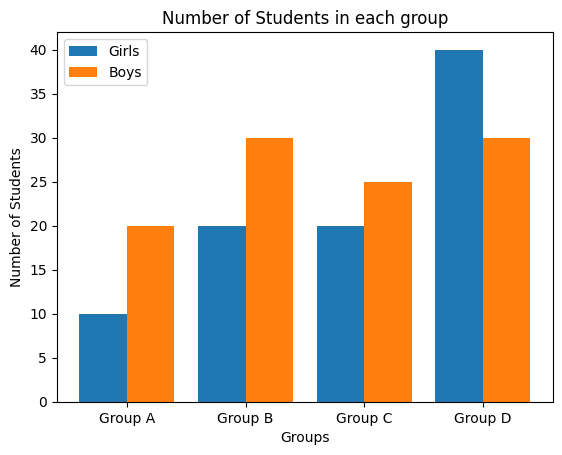

In [44]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
import os
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train/Vehicle_Information.csv
train/Accident_Information.csv


In [47]:
acc = pd.read_csv("train/Accident_Information.csv")
acc.head()

<ipython-input-47-0c3161b32f20>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  acc = pd.read_csv("train/Accident_Information.csv")


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [48]:
veh = pd.read_csv("train/Vehicle_Information.csv", encoding='ISO-8859-1')
acc.shape

(2047256, 34)

In [49]:
df2['Accident_Severity'] = df2['Accident_Severity'].astype('category')

In [50]:
df2 = df2[[c for c in df2 if c not in ['Accident_Severity']]
       + ['Accident_Severity']]

In [51]:
y = df2['Accident_Severity']
X = df2.iloc[:,:-1]

In [52]:
df2.to_csv("data.csv")

In [53]:
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# SMOTE

In [55]:
from imblearn.over_sampling import SMOTE


In [56]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [57]:
print("Before")
print(y.value_counts())
print("After")
print(pd.Series(y_resampled).value_counts())

Before
Accident_Severity
Slight     1368445
Serious     199235
Fatal        20633
Name: count, dtype: int64
After
Accident_Severity
Fatal      1231884
Serious    1231884
Slight     1231884
Name: count, dtype: int64


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1, stratify = y_resampled)

In [59]:
X_train.shape

(2956521, 15)

# Categorical Naive Bayes

In [60]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [61]:
pred = model.predict(X_test)

In [62]:

from sklearn.metrics import classification_report

In [63]:
report = classification_report(y_test, pred)
print("Naive Bayes(Categorical with SMOTE \n", report)

Naive Bayes(Categorical with SMOTE 
               precision    recall  f1-score   support

       Fatal       0.57      0.70      0.63    246377
     Serious       0.49      0.36      0.41    246377
      Slight       0.61      0.63      0.62    246377

    accuracy                           0.56    739131
   macro avg       0.56      0.56      0.55    739131
weighted avg       0.56      0.56      0.55    739131



# Complement Naive Bayes

In [64]:
from sklearn.naive_bayes import ComplementNB
model2 = ComplementNB()
model2.fit(X_train, y_train)
pred = model2.predict(X_test)

In [65]:
report = classification_report(y_test, pred)
print("\tNaive Bayes(ComplementNB) \n", report)

	Naive Bayes(ComplementNB) 
               precision    recall  f1-score   support

       Fatal       0.45      0.56      0.50    246377
     Serious       0.37      0.46      0.41    246377
      Slight       0.50      0.26      0.34    246377

    accuracy                           0.43    739131
   macro avg       0.44      0.43      0.42    739131
weighted avg       0.44      0.43      0.42    739131



# Bernoulli Naive Bayes

In [66]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(X_train, y_train)
pred = model3.predict(X_test)

In [67]:
report = classification_report(y_test, pred)
print("\tNaive Bayes(BernouuliNB) \n", report)

	Naive Bayes(BernouuliNB) 
               precision    recall  f1-score   support

       Fatal       0.52      0.65      0.57    246377
     Serious       0.36      0.22      0.27    246377
      Slight       0.48      0.54      0.51    246377

    accuracy                           0.47    739131
   macro avg       0.45      0.47      0.45    739131
weighted avg       0.45      0.47      0.45    739131

